In [1]:
library(tidyverse)
library(scales)
# adding LaTeX default fonts
sysfonts::font_add ("CMU Serif", "/Users/stawager/Downloads/cmu-serif/cmunrm.ttf")
sysfonts::font_add("CMU Serif Bold", "/Users/stawager/Downloads/cmu-serif/cmunbx.ttf")
sysfonts::font_add("CMU Serif Italic", "/Users/stawager/Downloads/cmu-serif/cmunti.ttf")
sysfonts::font_add("CMU Serif Italic Bold", "/Users/stawager/Downloads/cmu-serif/cmunbi.ttf")
showtext::showtext_auto()

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [2]:
df <- read.csv("results.csv")

In [3]:
glimpse(df)

Rows: 41
Columns: 5
$ zad       <int> 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, …
$ L         <int> 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 10, 1…
$ iter      <int> 5822, 34980, 6118, 8024, 4269, 5804, 7024, 6861, 4258, 21619…
$ time      <dbl> 6.181080e-01, 3.686515e+00, 6.190341e-01, 7.991779e-01, 4.31…
$ evolution <chr> "5071;5035;4994;5087;5064;5079;5020;5088;5158;5139;4978;4916…


In [4]:
zad1 <- df %>%
    filter(zad==1)

In [5]:
str2int <- function(v){
    return (as.integer(unlist(strsplit(v, ";"))))
}

In [6]:
zad1_evo <-str2int(zad1$evolution)/zad1$L^2

In [7]:
p2_x <- 1164
p2_y <- zad1_evo[p2_x]

p3_x <- 2328
p3_y <- zad1_evo[p3_x]

p4_x <- 3492
p4_y <- zad1_evo[p4_x]

p5_x <- 4656
p5_y <- zad1_evo[p5_x]

p6_x <- 5820
p6_y <- zad1_evo[p6_x]

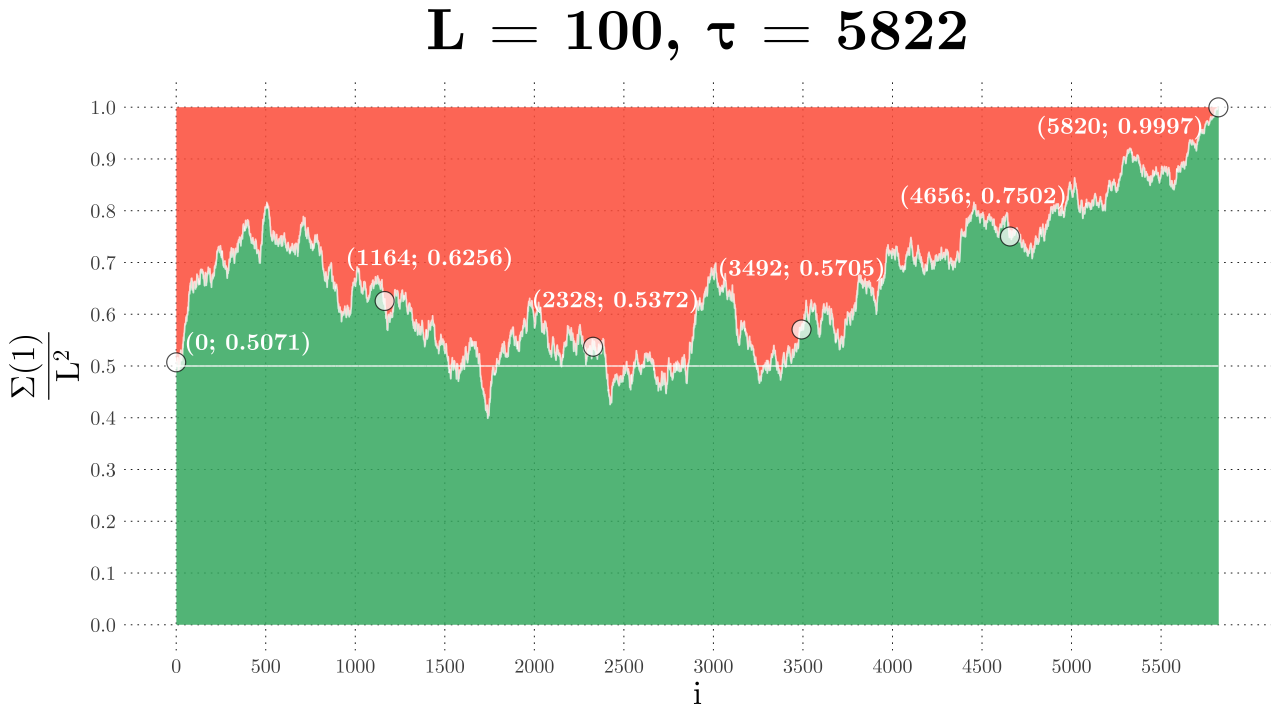

In [8]:
scale <- 1.5
options(
    repr.plot.width = 16/scale, 
    repr.plot.height = 9/scale)

# colors
goodcolor <- "mediumseagreen"
badcolor <- "tomato"

# plot
p <- ggplot() + 
    aes(x = 1:zad1$iter, 
        y = zad1_evo) +

    # 'yes' fill
    geom_ribbon( aes(ymin = 0, ymax = zad1_evo), fill = goodcolor, alpha = .85) +

    # 'no' fill
    geom_ribbon(aes(ymin = zad1_evo, ymax = 1), fill = badcolor, alpha = .85) +

    # evolution line / lineplot
    geom_line(linewidth = .5, color = "white", alpha = .71) +

    # starting point
    geom_point(aes(x = 0, y = zad1_evo[1]), 
        color = "black", fill = "white", alpha = .71, size = 5, shape = 21) +
    annotate("text", x = 400, y = zad1_evo[1]+.04, label = glue::glue("(0; {zad1_evo[1]})"),
        color = "white", size = 5, family = "CMU Serif Bold") +

    # 2nd point
    geom_point(aes(x = p2_x, y = p2_y), 
        color = "black", fill = "white", alpha = .71, size = 5, shape = 21) +
    annotate("text", x = p2_x+250, y = p2_y + 0.085, label = glue::glue("({p2_x}; {p2_y})"),
        color = "white", size = 5, family = "CMU Serif Bold") +

    # 3rd point
    geom_point(aes(x = p3_x, y = p3_y), 
        color = "black", fill = "white", alpha = .71, size = 5, shape = 21) +
    annotate("text", x = p3_x+125, y = p3_y + 0.092, label = glue::glue("({p3_x}; {p3_y})"),
        color = "white", size = 5, family = "CMU Serif Bold") +

    # 4th point
    geom_point(aes(x = p4_x, y = p4_y), 
        color = "black", fill = "white", alpha = .71, size = 5, shape = 21) +
    annotate("text", x = p4_x, y = p4_y + 0.12, label = glue::glue("({p4_x}; {p4_y})"),
        color = "white", size = 5, family = "CMU Serif Bold") +

    # 5th point
    geom_point(aes(x = p5_x, y = p5_y), 
        color = "black", fill = "white", alpha = .71, size = 5, shape = 21) +
    annotate("text", x = p5_x-150, y = p5_y + 0.080, label = glue::glue("({p5_x}; {p5_y})"),
        color = "white", size = 5, family = "CMU Serif Bold") +

    # 6th point
    geom_point(aes(x = p6_x, y = p6_y), 
        color = "black", fill = "white", alpha = .71, size = 5, shape = 21) +
    annotate("text", x = p6_x-550, y = p6_y - 0.035, label = glue::glue("({p6_x}; {p6_y})"),
        color = "white", size = 5, family = "CMU Serif Bold") +
    
    # bottom right corner specs
    #  annotate(
    #     "text", 
    #     x = zad1$iter-100, 
    #     y = 0.15,
    #     label = glue::glue("L = {zad1$L}\n{zad1$iter} iteracji\n±{round(zad1$time, 2)} sekund"),
    #     color = "white", 
    #     size = 7, 
    #     family = "CMU Serif Bold",
    #     hjust = 1) +

    # 50% line
    geom_line(aes(x = 1:zad1$iter, y = 0.5), 
        color = "white", alpha = .71,) +

    # styling    
    theme_minimal() +
    labs(x = "i", y = bquote(frac(Sigma * "(1)", L^2)), title = bquote("L = " * .(zad1$L) * ", " *tau * " = " * .(zad1$iter))) +
    scale_y_continuous(breaks = seq(0, 1, by = 0.1), limits = c(0, NA)) +
    scale_x_continuous(breaks = seq(0, zad1$iter, by = 500)) +
    theme( 
        text = element_text(family = "CMU Serif"),
        axis.text = element_text(size=12),
        axis.title = element_text(size = 20, family = "CMU Serif"),
        panel.grid = element_line(linetype = "dotted", linewidth = 0.25, color = "black"),
        panel.grid.minor = element_blank(),
        plot.title = element_text(size = 35, family = "CMU Serif Bold", hjust = .5))
p
ggsave(filename = "plots/zad1line.pdf", plot = p, width = 16/1.5, height = 9/1.5, units = "in")

___

In [9]:
zad2 <- df %>%
    filter(zad == 2)

zad3_10 <- df %>%
    filter(zad == 3, L == 10)

zad3_50 <- df %>%
    filter(zad == 3, L == 50)

zad3_100 <- df %>%
    filter(zad == 3, L == 100)

zad3_200 <- df %>%
    filter(zad == 3, L == 200)

In [10]:
plot_colors <- c(
"#4477AA", "#66CCEE", "#228833", "#CCBB44", 
"#EE7733", "#CC3311", "#AA3377", "#EE99AA",
"#44AA99", "#999933"
)

In [11]:
show_lineplot <- function(data, lw) {
  p <- ggplot() + theme_minimal()

  for (i in 1:10) {
    evolution_i <- as.numeric(strsplit(data$evolution[i], ";")[[1]])
    iter_i <- 1:length(evolution_i)
    df_i <- data.frame(iter = iter_i, y = evolution_i)
    
    p <- p +
      # 50% line
      geom_line(
        aes(x = 1:max(data$iter), y = 0.5),
        alpha = .3,
        color = "lightgrey",
        linewidth = .7
      ) +
      # data lines with Okabe-Ito colors
      geom_line(
        data = df_i,
        aes(x = iter, y = y/data$L[1]^2),
        color = plot_colors[i],
        linewidth = lw,
        alpha = .5
      ) +
      theme_minimal() +
      labs(
        x = "i",
        y = bquote(frac(Sigma * "(1)", L^2)),
        title = glue::glue("L = {data$L[1]}, n = 10")
      ) +
      theme(
        text = element_text(family = "CMU Serif"),
        axis.text = element_text(size = 12),
        axis.title = element_text(size = 20, family = "CMU Serif"),
        panel.grid = element_line(linetype = "dotted", linewidth = 0.25, color = "darkgrey"),
        panel.grid.minor = element_blank(),
        plot.title = element_text(size = 35, family = "CMU Serif Bold", hjust = .5)
      )
  }
  
  return(p)
}

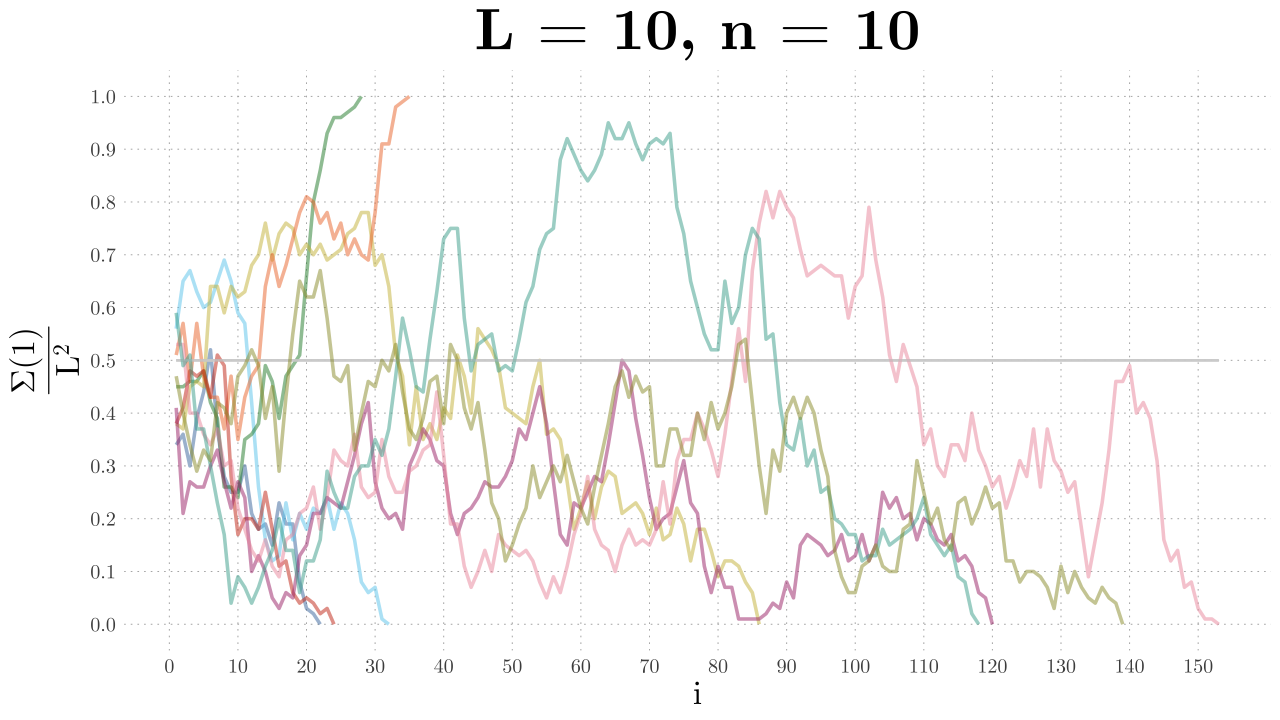

In [12]:
plot <- show_lineplot(zad3_10, lw = 1)
plot <- plot +
    scale_y_continuous(
        breaks = seq(0, 1, 0.1)) +
    scale_x_continuous(
        breaks = seq(0, max(zad3_10$iter), by=10))
plot
ggsave(filename = "plots/zad3line10.pdf", plot = plot, width = 16/1.5, height = 9/1.5, units = "in")

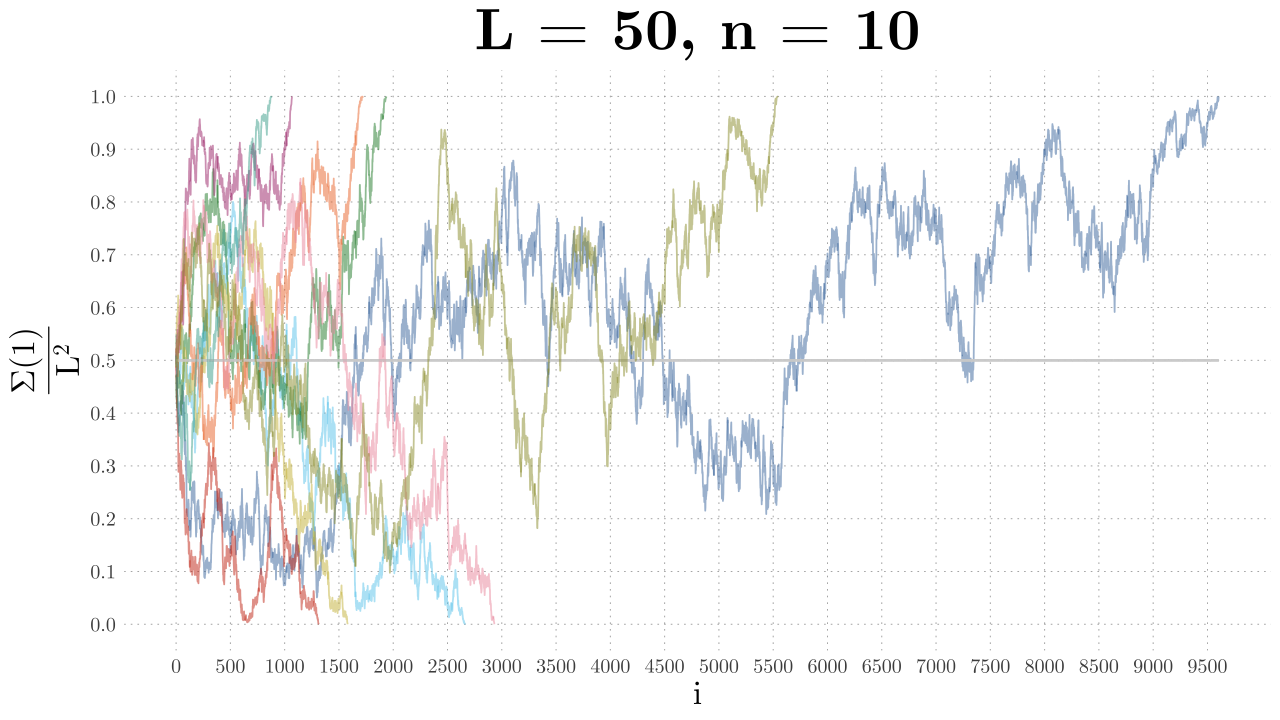

In [13]:
plot <- show_lineplot(zad3_50, lw = .5)
plot <- plot +
    scale_y_continuous(
         breaks = seq(0, 1, 0.1)) +
    scale_x_continuous(
        breaks = seq(0, max(zad3_50$iter), by=500))
plot
ggsave(filename = "plots/zad3line50.pdf", plot = plot, width = 16/1.5, height = 9/1.5, units = "in")

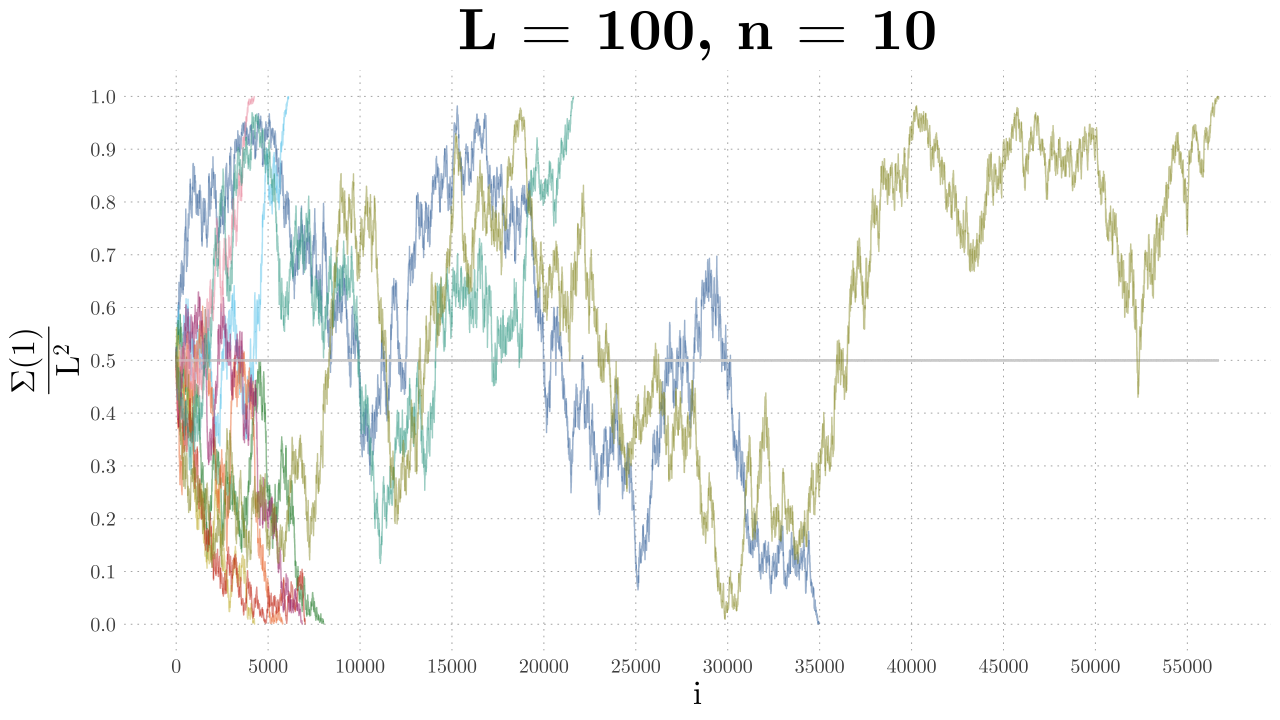

In [14]:
plot <- show_lineplot(zad2, lw = .4)
plot <- plot + 
    scale_y_continuous(
         breaks = seq(0, 1, 0.1)) +
    scale_x_continuous(
        breaks = seq(0, max(zad2$iter), by = 5000)) 
plot
ggsave(filename = "plots/zad3line100.pdf", plot = plot, width = 16/1.5, height = 9/1.5, units = "in")

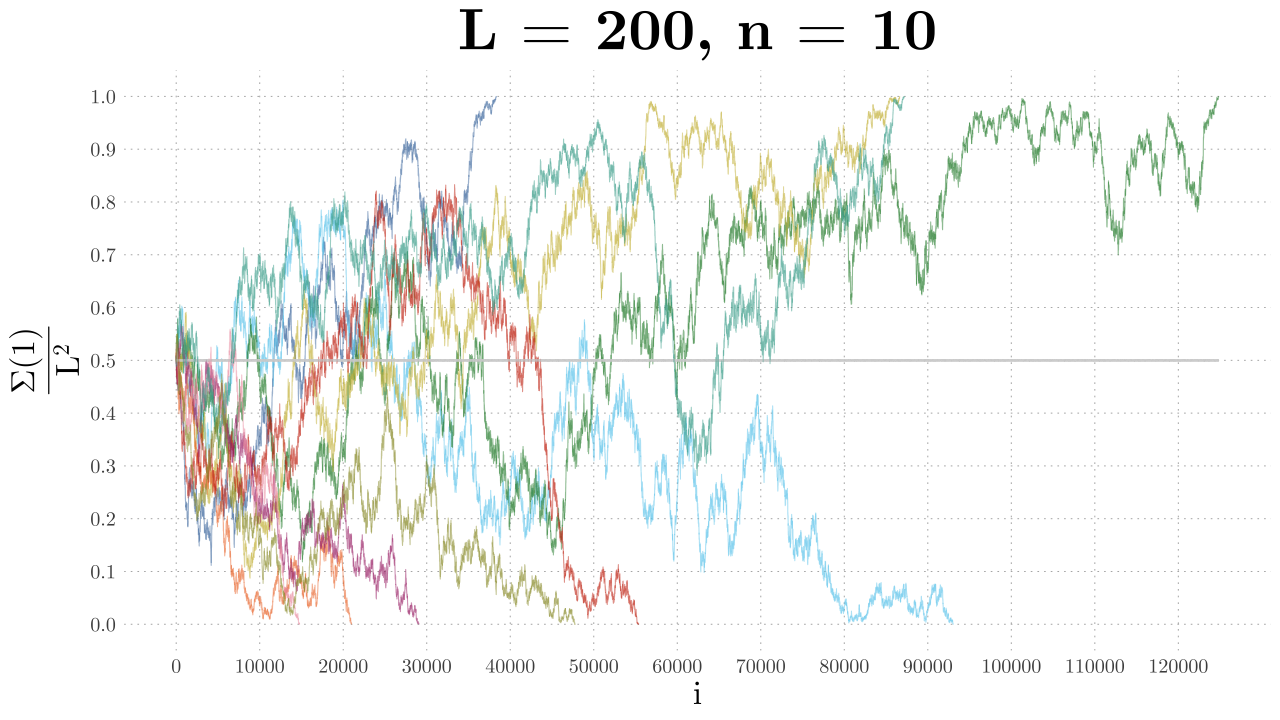

In [15]:
plot <- show_lineplot(zad3_200, lw = .3)
plot <- plot +
    scale_y_continuous(
         breaks = seq(0, 1, 0.1)) +
    scale_x_continuous(
        breaks = seq(0, max(zad3_200$iter), by=10000))
plot
ggsave(filename = "plots/zad3line200.pdf", plot = plot, width = 16/1.5, height = 9/1.5, units = "in")

___

In [16]:
show_barplot <- function(data, start, stop, step) {
  mean_iter <- mean(data$iter)
  sd_iter <- sd(data$iter)
  
  p <- data %>%
    mutate(id = as.factor(1:10)) %>%
    select(id, iter) %>%
    ggplot() +
    aes(x = reorder(id, iter), y = iter) +
    # Add a rect annotation instead of geom_ribbon
    geom_bar(stat = "identity", fill = plot_colors, alpha = .75) +
    geom_text(aes(label = iter), vjust = 1.5, size = 6, family = "CMU Serif Bold", color = "white") +
    annotate(geom = "text", x = ifelse(data$L[1] == 10, 2, 2.5), y = mean_iter + 0.05*max(data$iter), 
             label = bquote(bar(tau) * " = " * .(round(mean_iter, 2)) * ", " * sigma[tau] * " = " * .(round(sd_iter, 2))), 
             family = "CMU Serif", size = 7) +
    geom_hline(yintercept = mean_iter + sd_iter, linetype = "dashed", color = "black", alpha = .2) +
    geom_hline(yintercept = mean_iter - sd_iter, linetype = "dashed", color = "black", alpha = .2) +
    geom_hline(aes(yintercept = mean_iter), linetype = "dashed") +
    annotate("rect", 
             xmin = 0.5, 
             xmax = 10.5, 
             ymin = mean_iter - sd_iter, 
             ymax = mean_iter + sd_iter,
             fill = "black", alpha = 0.1) +
    theme_minimal() +
    scale_y_continuous(breaks = seq(start, stop, by = step)) +
    labs(x = "k", y = bquote(tau[k]), 
         title = glue::glue("L = {data$L}, n = 10")) +
    theme(
      text = element_text(family = "CMU Serif"),
      axis.text = element_text(size = 12),
      axis.title = element_text(size = 20, family = "CMU Serif"),
      panel.grid = element_line(linetype = "dotted", linewidth = 0.5, color = "darkgrey"),
      panel.grid.minor = element_line(linetype = "dotted", linewidth = 0.25, color = "darkgrey"),
      panel.grid.major.x = element_blank(),
      plot.title = element_text(size = 35, family = "CMU Serif Bold", hjust = .5)
    )
  return(p)
}

Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”


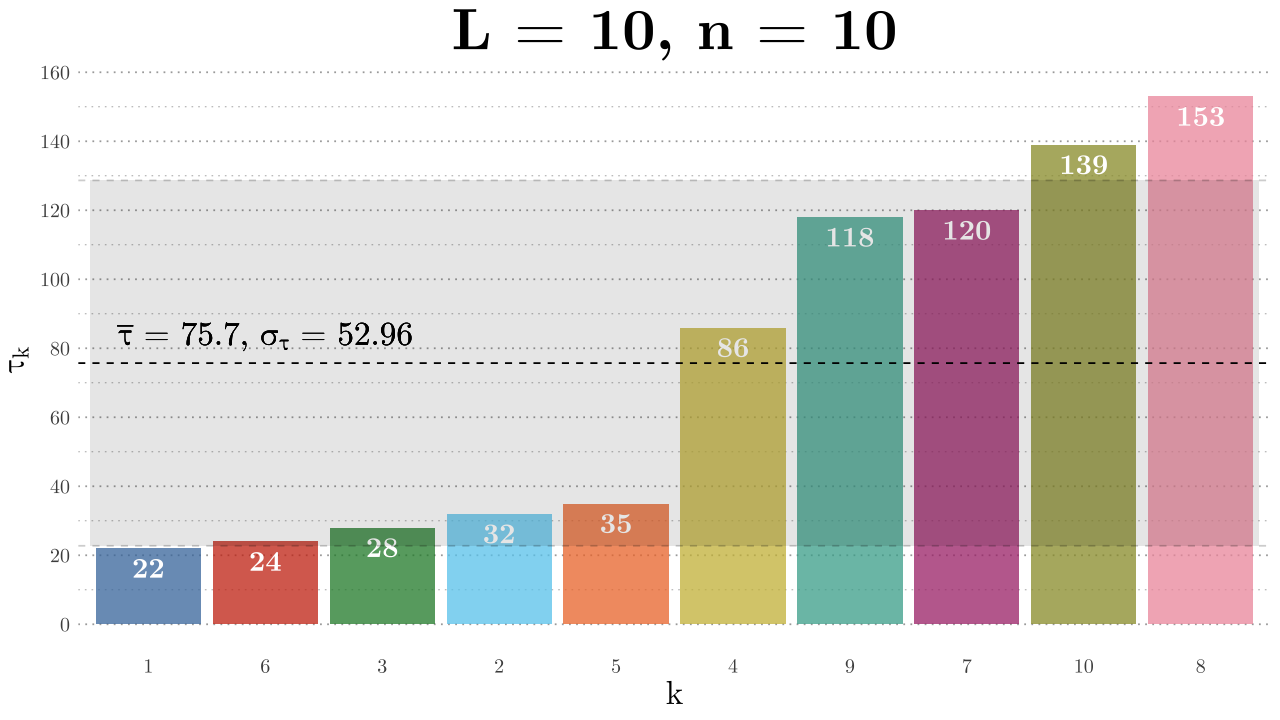

In [17]:
p <- show_barplot(zad3_10, 0, 160, 20)
p 
ggsave(filename = "plots/zad3bar10.pdf", plot = p, width = 16/1.5, height = 9/1.5, units = "in")

Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”


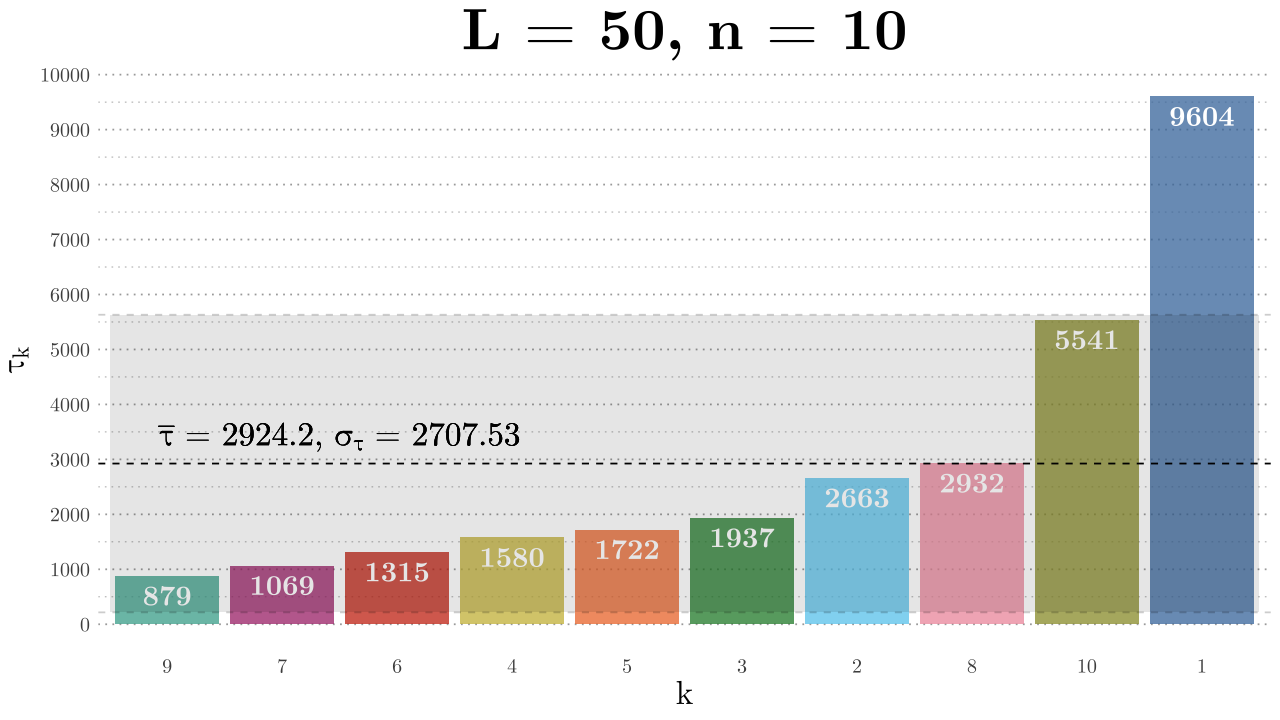

In [18]:
p <- show_barplot(zad3_50, 0, 10000, 1000)
p 
ggsave(filename = "plots/zad3bar50.pdf", plot = p, width = 16/1.5, height = 9/1.5, units = "in")

Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”


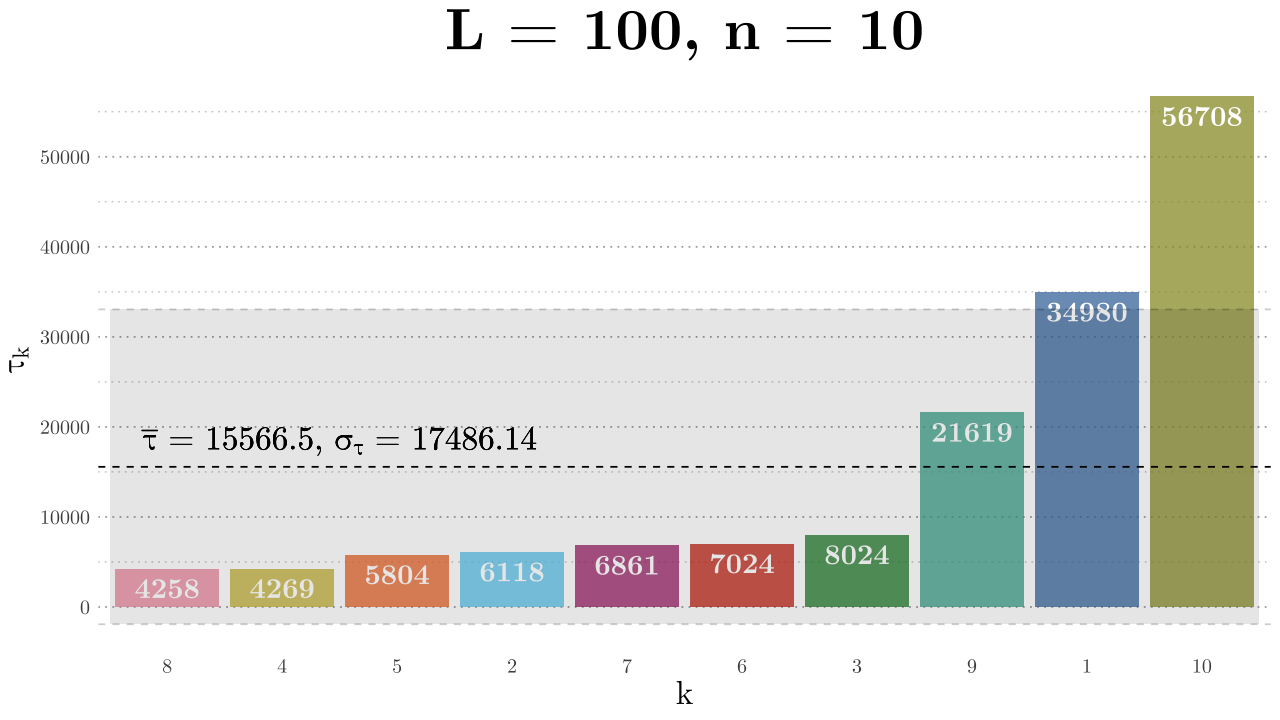

In [19]:
p <- show_barplot(zad2, 0, 60000, 10000)
p
ggsave(filename = "plots/zad3bar100.pdf", plot = p, width = 16/1.5, height = 9/1.5, units = "in")

Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”


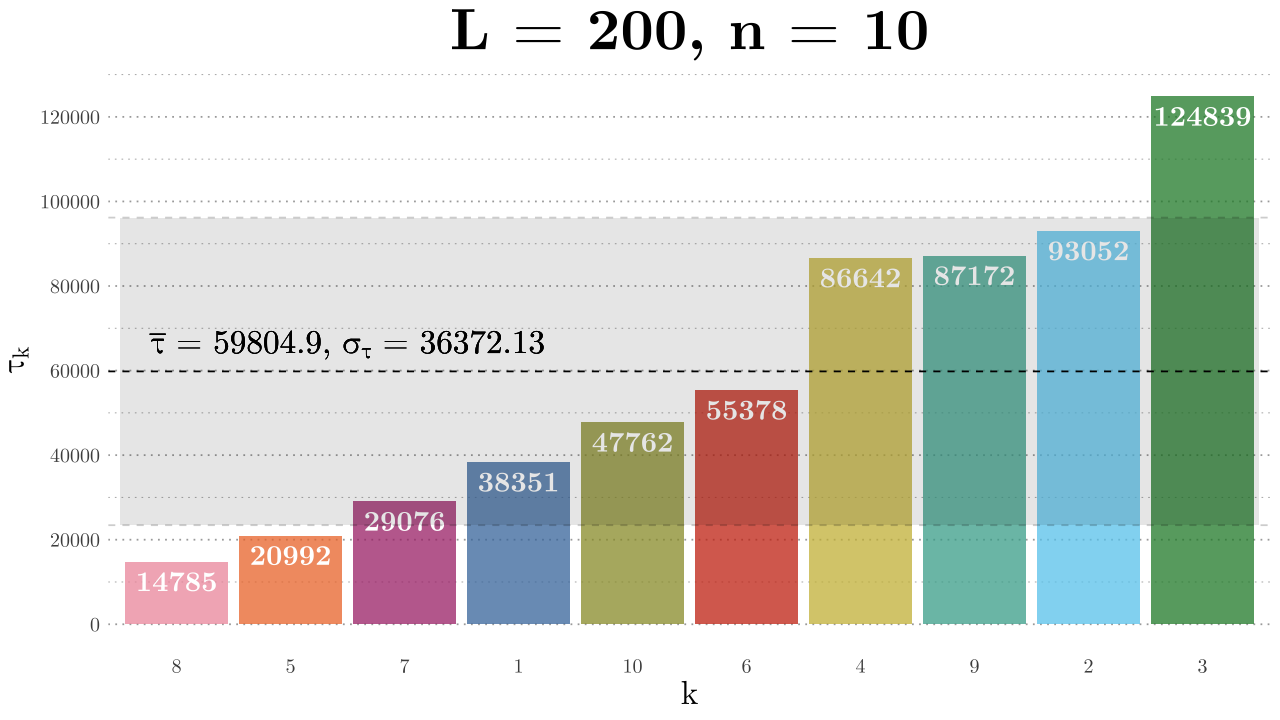

In [20]:
p <- show_barplot(zad3_200, 0, 140000, 20000)
p
ggsave(filename = "plots/zad3bar200.pdf", plot = p, width = 16/1.5, height = 9/1.5, units = "in")

In [21]:
make_grid <- function(iteration_number) {

    grid <- read.csv(paste0("grid_snapshots/grid", iteration_number, ".csv"), header = FALSE)
    colnames(grid) <- as.character(1:100)

    grid <- tibble::rowid_to_column(grid, "ID")
    grid_long <- reshape2::melt(grid, id.vars = "ID", variable.name = "col", value.name = "value")
    colnames(grid_long) <- c("x", "y", "value")
    scale <- 2
    options(
        repr.plot.width = 16 / scale, 
        repr.plot.height = 16 / scale)

    p <- ggplot(grid_long) +
        aes(x = x, y = y, fill = factor(value)) + 
        geom_tile() + 
        coord_fixed(expand = FALSE) + 
        theme_minimal() + 
        scale_fill_manual(
            values = c("0" = scales::alpha(badcolor, .85), "1" = scales::alpha(goodcolor, .85)),
            labels = c('0 ("nie")', '1 ("tak")'),
            name = NULL,
        ) +
        labs(title = glue::glue('L=100, i={iteration_number}, Σ(1)={ifelse(i==0,zad1_evo[i+1]*10000,zad1_evo[i]*10000)}')) +
        theme(
            legend.position = "bottom",
            legend.direction = "horizontal",
            legend.key.spacing.x = unit(1, "cm"),
            legend.text = element_text(size = 14, family = "CMU Serif"),
            axis.text = element_blank(),
            axis.title.y = element_blank(),
            panel.grid = element_blank(),
            axis.ticks.x = element_blank(),
            plot.title = element_text(size = 30, family = "CMU Serif Bold", hjust = .5),
            axis.title.x = element_blank()
        )

    return(p)
}


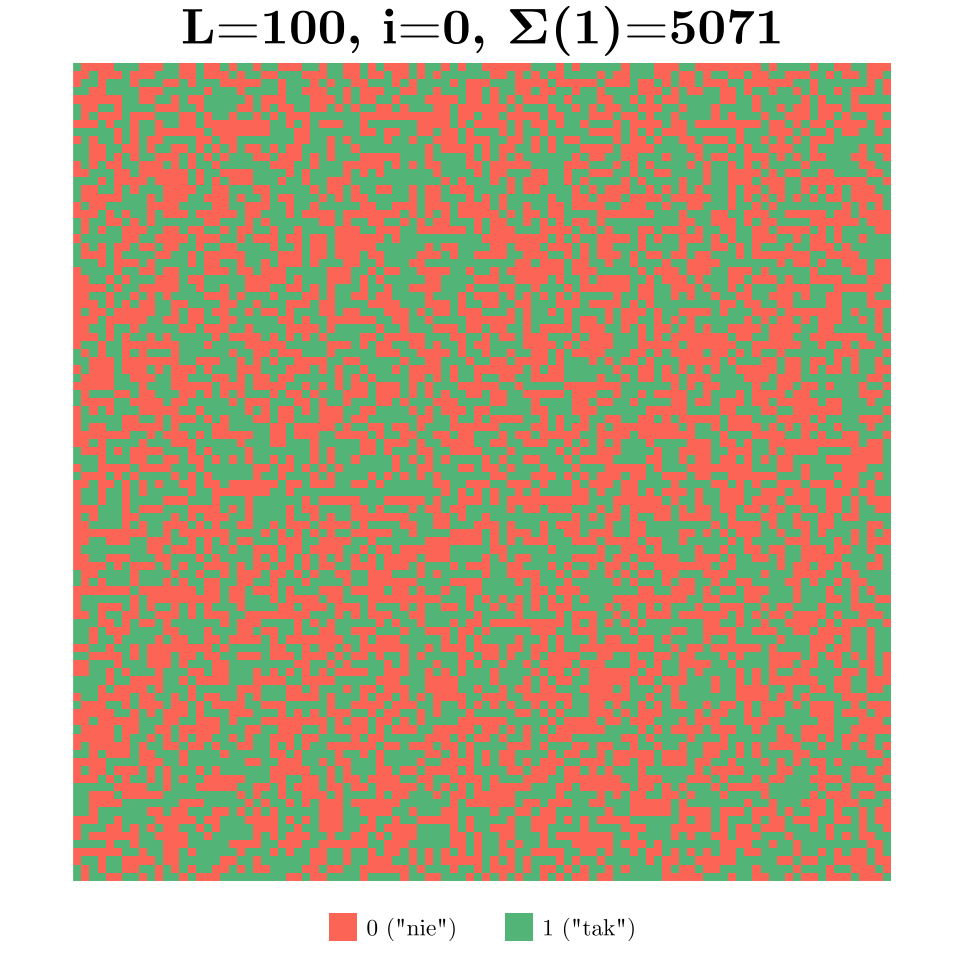

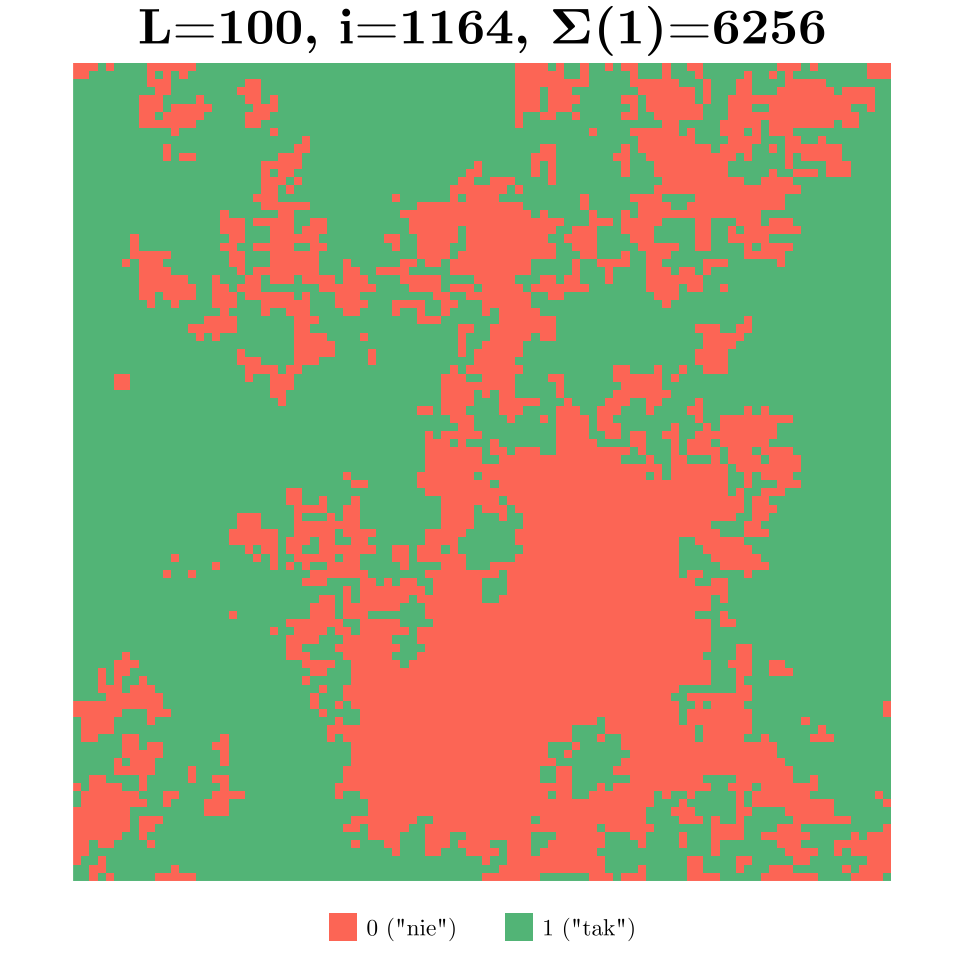

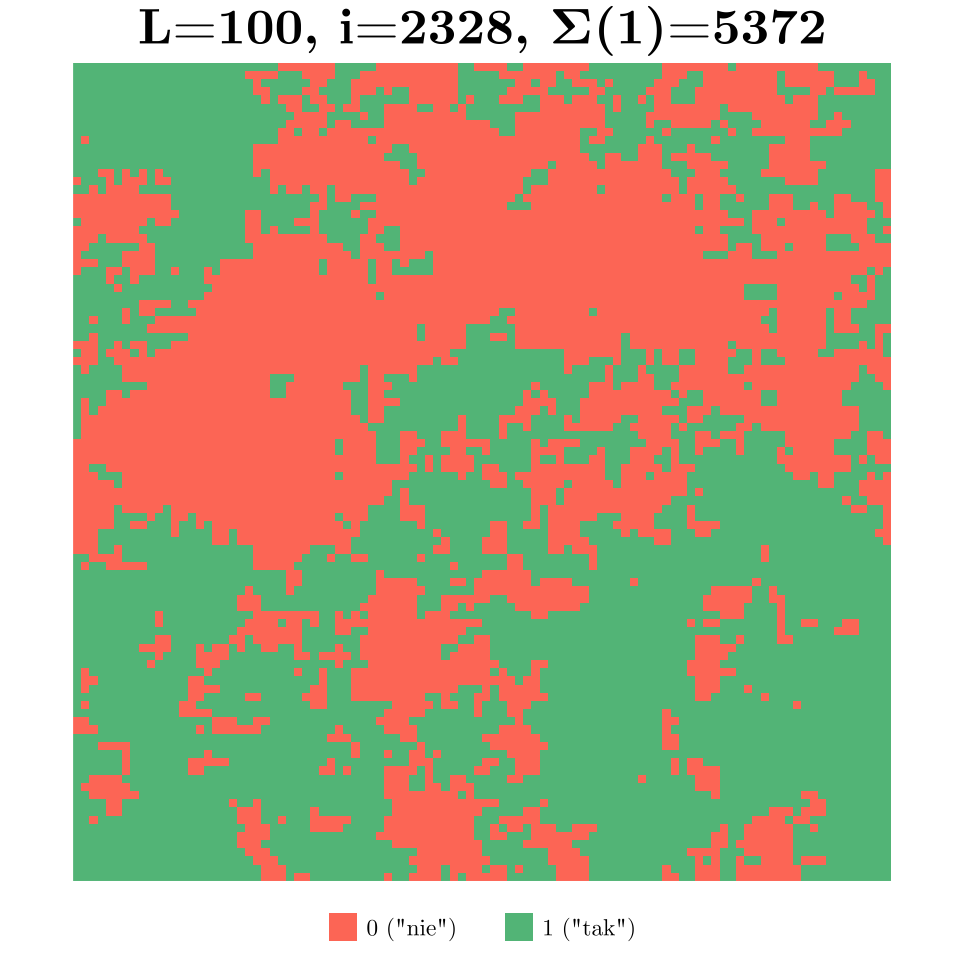

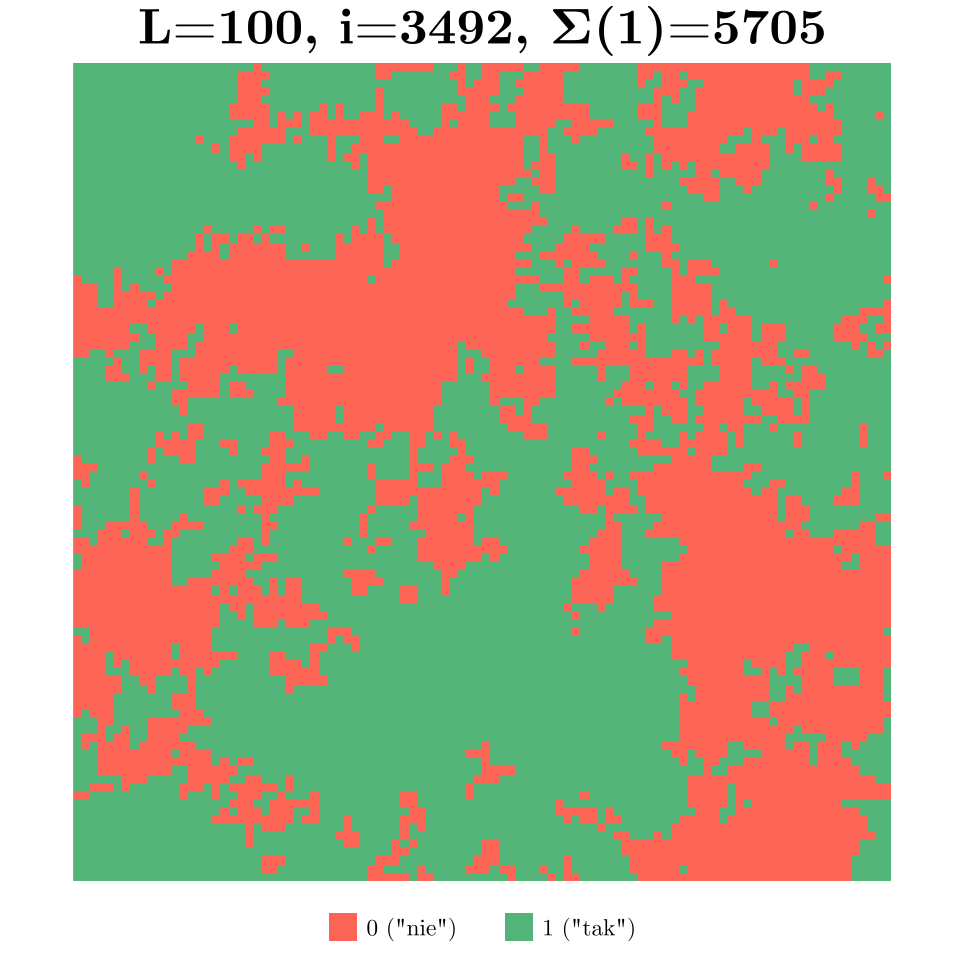

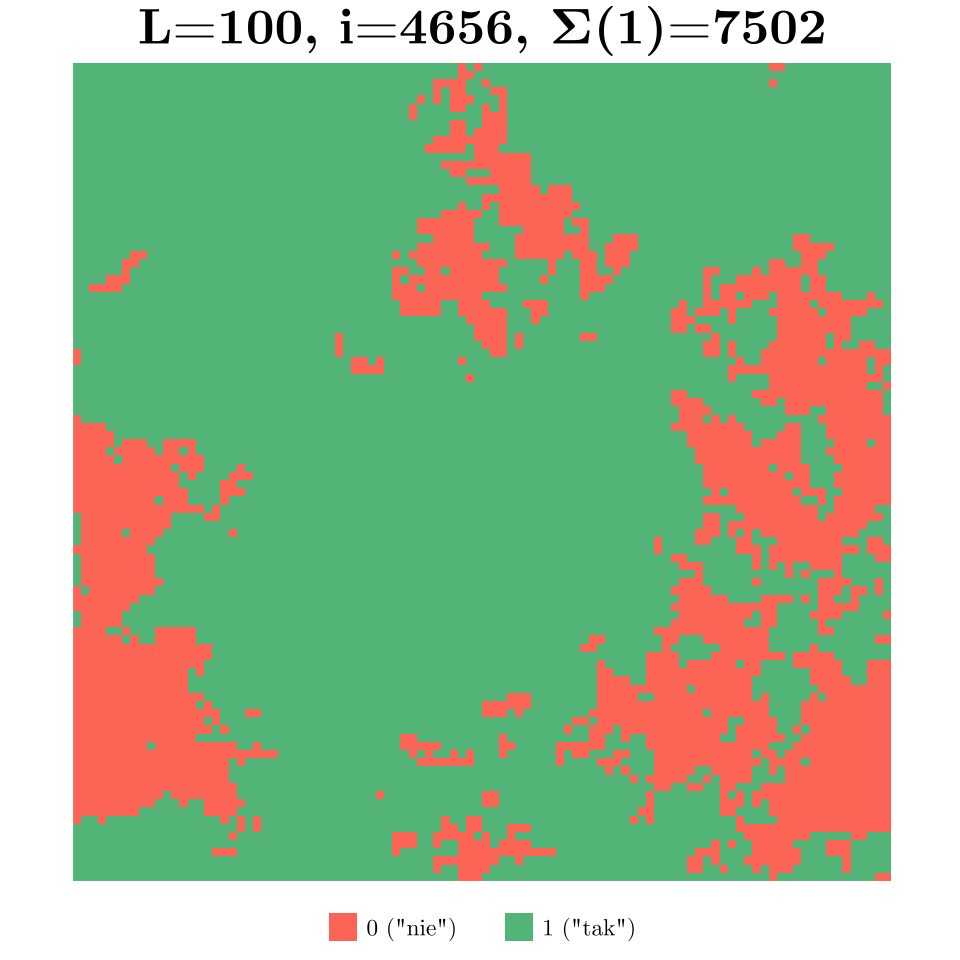

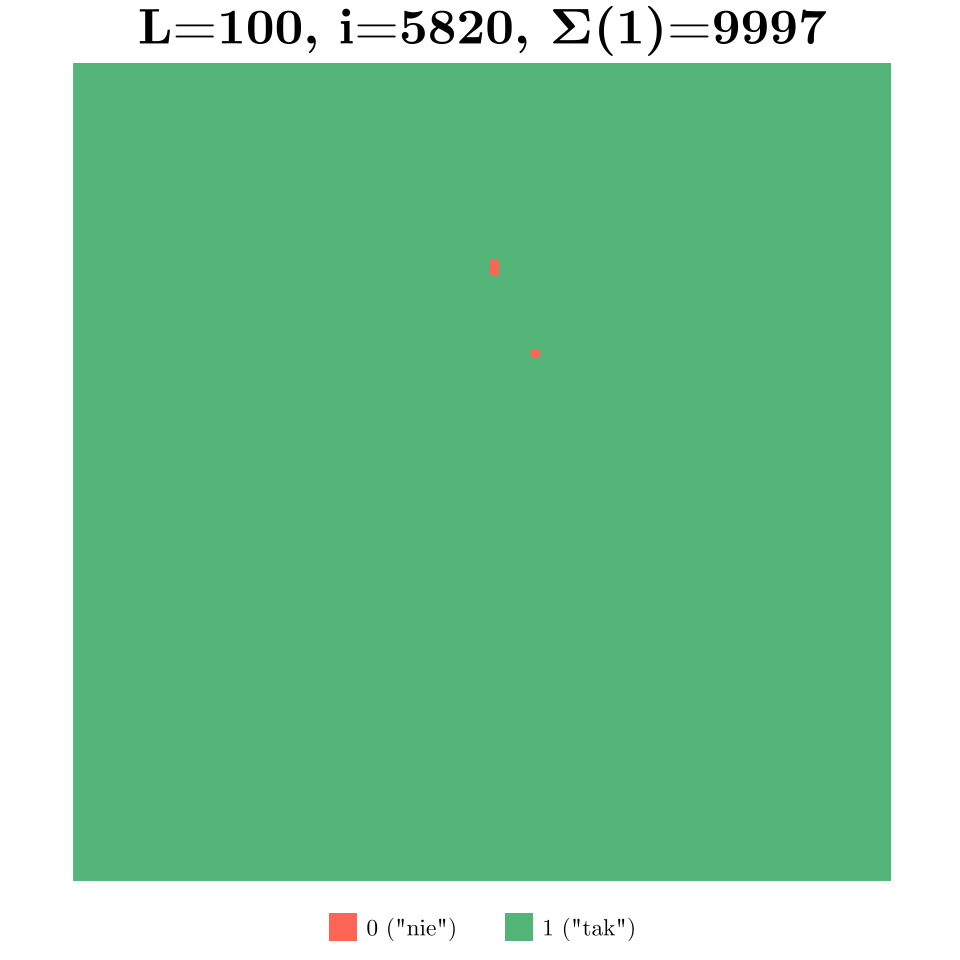

In [22]:
snapshot_values = c(0, 1164, 2328, 3492, 4656, 5820);
for(i in snapshot_values){
    p <- make_grid(i)
    print(p)
    ggsave(filename = glue::glue("plots/grid{i}.pdf"), plot = p, width = 16/2, height = 16/2, units = "in")
}

In [23]:
stats_df <- data.frame(L=c(10, 50, 100, 200),
                       mean = c(mean(zad3_10$iter), 
                                mean(zad3_50$iter), 
                                mean(zad2$iter), 
                                mean(zad3_200$iter)),
                        sd = c(sd(zad3_10$iter), 
                               sd(zad3_50$iter), 
                               sd(zad2$iter), 
                               sd(zad3_200$iter)))

In [24]:
stats_df <- stats_df %>%
    mutate(sem = sd/sqrt(10),
           L_squared = L^2,
           lower = mean-1.96*sem,
           higher = mean+1.96*sem)

In [25]:
stats_df

L,mean,sd,sem,L_squared,lower,higher
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10,75.7,52.95501,16.74585,100,42.87814,108.5219
50,2924.2,2707.53093,856.19646,2500,1246.05494,4602.3451
100,15566.5,17486.13845,5529.60250,10000,4728.47910,26404.5209
200,59804.9,36372.13299,11501.87836,40000,37261.21841,82348.5816


In [26]:
lm_model <- lm(mean ~ L_squared, data = stats_df)
summary(lm_model)
summary(lm_model)$coefficients


Call:
lm(formula = mean ~ L_squared, data = stats_df)

Residuals:
      1       2       3       4 
  93.14 -664.85  707.19 -135.48 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -167.70769  451.37258  -0.372 0.745898    
L_squared      1.50270    0.02185  68.759 0.000211 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 696.1 on 2 degrees of freedom
Multiple R-squared:  0.9996,	Adjusted R-squared:  0.9994 
F-statistic:  4728 on 1 and 2 DF,  p-value: 0.0002114


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-167.707685,451.37258286,-0.3715504,0.745897530
L_squared,1.502702,0.02185459,68.7591229,0.000211447


In [27]:
options(repr.plot.width = 16 / scale, 
        repr.plot.height = 9 / scale)

`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”
`geom_smooth()` using formula = 'y ~ x'
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”


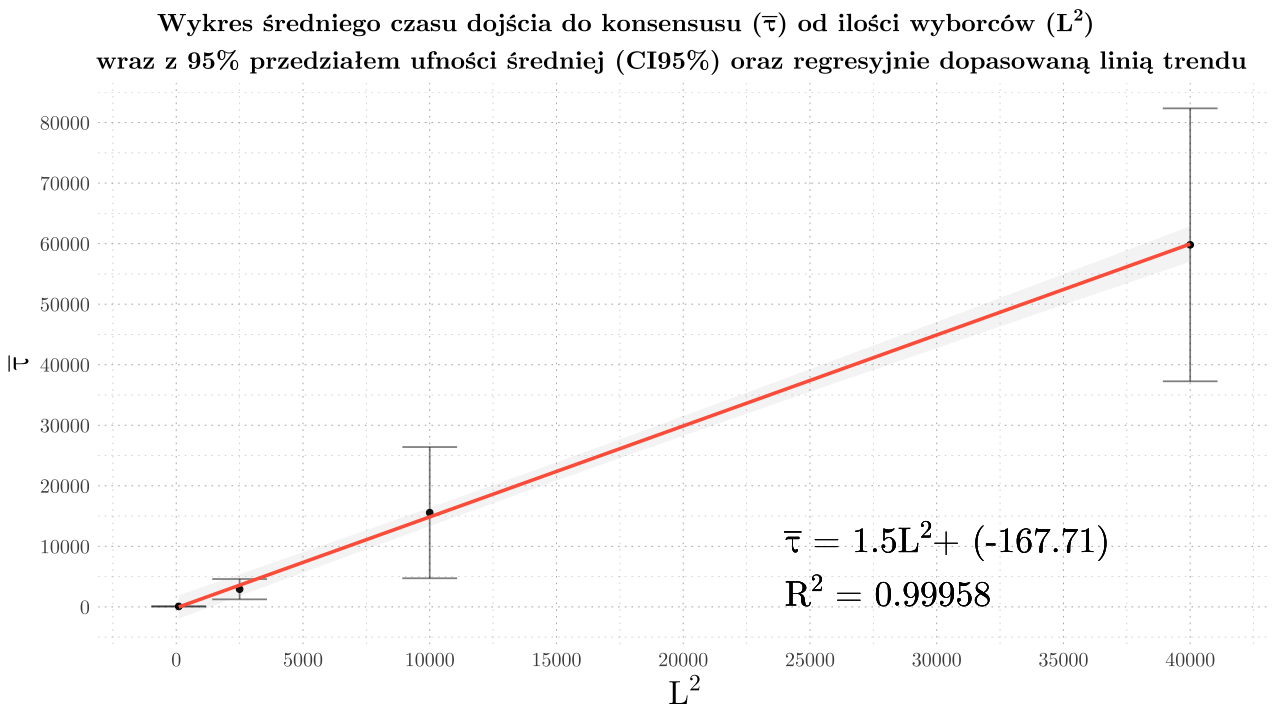

In [48]:
scale <- 1.5

model <- lm(mean ~ L_squared, data = stats_df)
intercept_round <- round(coef(model)[1], 2)
slope_round <- round(coef(model)[2], 2)
r_squared_round <- round(summary(model)$r.squared, 5)

eq_text <- bquote(bar(tau) * " = " * .(slope_round) * L^2 * "+ (" * .(intercept_round) * ")")
eq_text2 <-  bquote(R^2 * " = " * .(r_squared_round))

p <- ggplot(stats_df) + 
    aes(x = L_squared, y = mean) +
    geom_point() +
    geom_errorbar(aes(ymin = lower, ymax = higher), alpha = .5) +
    geom_smooth(method = 'lm', color = "tomato", alpha = .1) +
    scale_y_continuous(breaks = seq(0, 80000, 10000)) +
    scale_x_continuous(breaks = seq(0, 40000, 5000)) +
    theme_minimal() + 
    labs(
        x = bquote(L^2),
        y = bquote(bar(tau)),
        title = bquote("Wykres średniego czasu dojścia do konsensusu (" * bar(tau) * ") od ilości wyborców (" * L^2 * ")"),
        subtitle = "wraz z 95% przedziałem ufności średniej (CI95%) oraz regresyjnie dopasowaną linią trendu"
    ) +
    theme(
        text = element_text(family = "CMU Serif"),
        axis.text = element_text(size = 12),
        axis.title = element_text(size = 20, family = "CMU Serif"),
        panel.grid = element_line(linetype = "dotted", linewidth = 0.25, color = "darkgrey"),
        plot.title = element_text(size = 15, family = "CMU Serif Bold", hjust = 0.25),
        plot.subtitle = element_text(size = 15, family = "CMU Serif Bold", hjust = -0.1)
    ) +
    annotate(
        "text",
        x = max(stats_df$L_squared) * 0.6,
        y = min(stats_df$mean) * 1.1+7500,
        label = eq_text,
        hjust = 0,
        vjust = 0,
        size = 5 * scale,
        family = "CMU Serif"
    ) + 
    annotate(
        "text",
        x = max(stats_df$L_squared) * 0.6,
        y = min(stats_df$mean) * 1.1,
        label = eq_text2,
        hjust = 0,
        vjust = 0,
        size = 5 * scale,
        family = "CMU Serif"
    )

p

ggsave(filename = "plots/zfinal.pdf", plot = p, width = 16/1.5, height = 9/1.5, units = "in")


`geom_smooth()` using formula = 'y ~ x'


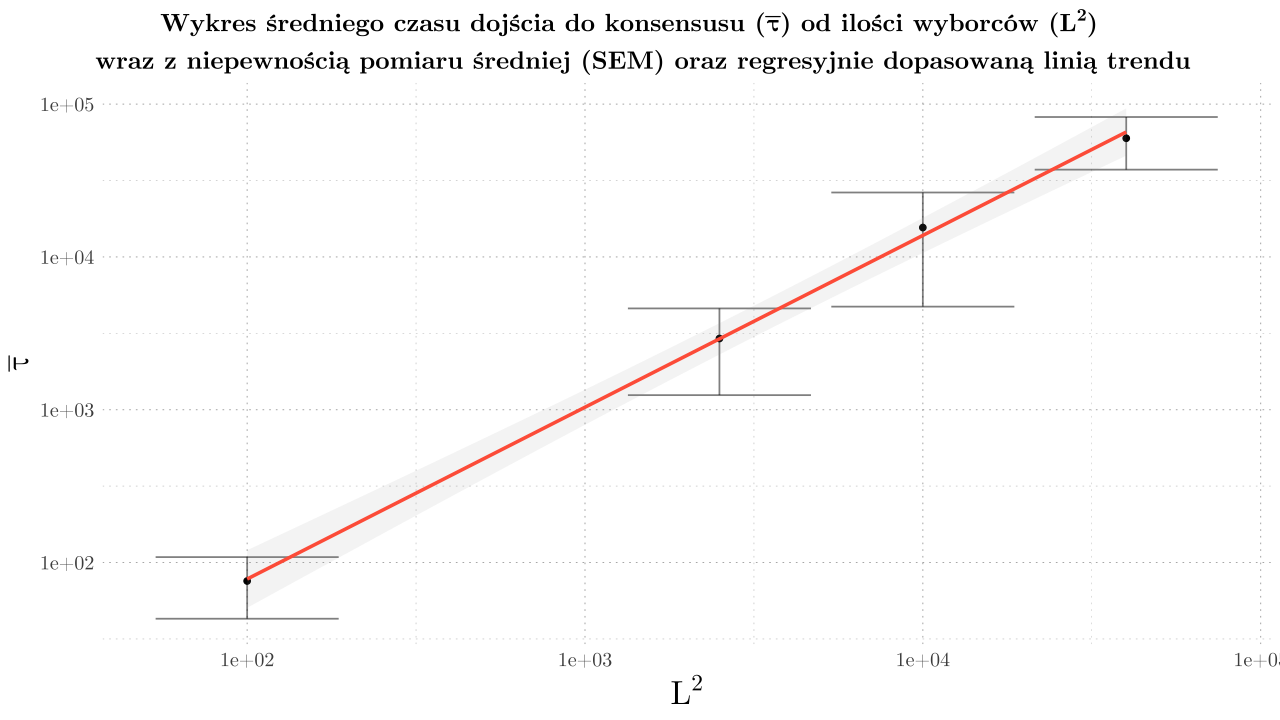

In [29]:
scale <- 1.5
p <- ggplot(stats_df) + 
    aes(x = L_squared, y = mean)+
    geom_point() +
    geom_errorbar(aes(ymin = lower, ymax = higher), alpha=.5) +
    geom_smooth(method='lm', color = "tomato", alpha = .1) +
    # scale_y_continuous(breaks = seq(0, 80000, 10000)) +
    # scale_x_continuous(breaks = seq(0, 40000, 5000)) +
    scale_y_log10() + 
    scale_x_log10() +
    theme_minimal() + 
    labs(
        x = bquote(L^2),
        y = bquote(bar(tau)),
        title = bquote("Wykres średniego czasu dojścia do konsensusu (" * bar(tau) * ") od ilości wyborców (" * L^2 * ")"),
        subtitle = "wraz z niepewnością pomiaru średniej (SEM) oraz regresyjnie dopasowaną linią trendu") +
      theme(
        text = element_text(family = "CMU Serif"),
        axis.text = element_text(size = 12),
        axis.title = element_text(size = 20, family = "CMU Serif"),
        panel.grid = element_line(linetype = "dotted", linewidth = 0.25, color = "darkgrey"),
        plot.title = element_text(size = 15, family = "CMU Serif Bold", hjust = 0.25),
        plot.subtitle = element_text(size = 15, family = "CMU Serif Bold", hjust = -0.1)
      )

p

In [30]:
stats_df %>%
    select(L, L_squared, mean, sd, sem, lower, higher) %>%
    round(2) %>%
    write.csv("summary.csv")

In [31]:
sum <- 0
for(k in 1:10){
    sum <- sum + (zad2$iter[k]-15566.5)^2
}
sum

[1] 2751885340

In [32]:
sqrt(sum)/3

[1] 17486.14